In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data preparation

In [3]:
data = pd.read_csv('pure_data_miner.csv')
data.head(5)

index             Name  Netflows First_Protocol Second_Protocol  \
0    176   29-csves/3.csv         6            TCP             NaN   
1   1328  682-csves/0.csv       483            TCP             UDP   
2     33    9-csves/4.csv         4            TCP             NaN   
3    126   66-csves/0.csv        18            TCP             UDP   
4     15    8-csves/0.csv        47            TCP             UDP   

  Third_Protocol       p1_d     p2_d       p3_d  duration  ...  third_dp  \
0            NaN   93.88275  241.440  242.21475  1057.191  ...   51748.0   
1            NaN    0.00000    0.002    3.00200  2609.420  ...      80.0   
2            NaN  231.44000  231.440  231.44000   925.760  ...       NaN   
3            NaN   75.77875  103.660  135.16800  1825.739  ...    1900.0   
4            NaN    3.00500   89.612  149.42500  4189.142  ...    1900.0   

   p1_ip  p2_ip  p3_ip  p1_ib   p2_ib    p3_ib      Type  Cryptocurrency  \
0   11.5   16.0  21.25  478.0  2669.0  11625.0      mine         Bitcoin   
1    1.0    2.0  11.00   32.0    80.0   1158.0  not_mine             NaN   
2    8.0    8.0   8.00  330.0  1005.5   1681.0      mine          Monero   
3    3.0    4.0   6.00   96.0   128.0    234.0  not_mine             NaN   
4    4.0    5.0   7.00  116.0   188.0    280.0  not_mine             NaN   

   Id_Cryptocurrency  
0                  1  
1                  0  
2                  5  
3                  0  
4                  0  

[5 rows x 34 columns]

# Data Structuring

In [4]:
data_numeric_int = (data.dtypes == 'int64')
data_numeric_float = (data.dtypes == 'float64')
data_object = (data.dtypes == 'object')
data_numeric_int = [c for c in  data_numeric_int.index if data_numeric_int[c]]
data_numeric_float = [c for c in data_numeric_float.index if data_numeric_float[c]]
data_object = [c for c in data_object.index if data_object[c]]

In [5]:
y = data[['Type']]
data = data.drop('Type',axis=1)
X = data

In [6]:
z = pd.concat([X,y], axis = 1)
z.head()

index             Name  Netflows First_Protocol Second_Protocol  \
0    176   29-csves/3.csv         6            TCP             NaN   
1   1328  682-csves/0.csv       483            TCP             UDP   
2     33    9-csves/4.csv         4            TCP             NaN   
3    126   66-csves/0.csv        18            TCP             UDP   
4     15    8-csves/0.csv        47            TCP             UDP   

  Third_Protocol       p1_d     p2_d       p3_d  duration  ...  third_dp  \
0            NaN   93.88275  241.440  242.21475  1057.191  ...   51748.0   
1            NaN    0.00000    0.002    3.00200  2609.420  ...      80.0   
2            NaN  231.44000  231.440  231.44000   925.760  ...       NaN   
3            NaN   75.77875  103.660  135.16800  1825.739  ...    1900.0   
4            NaN    3.00500   89.612  149.42500  4189.142  ...    1900.0   

   p1_ip  p2_ip  p3_ip  p1_ib   p2_ib    p3_ib  Cryptocurrency  \
0   11.5   16.0  21.25  478.0  2669.0  11625.0         Bitcoin   
1    1.0    2.0  11.00   32.0    80.0   1158.0             NaN   
2    8.0    8.0   8.00  330.0  1005.5   1681.0          Monero   
3    3.0    4.0   6.00   96.0   128.0    234.0             NaN   
4    4.0    5.0   7.00  116.0   188.0    280.0             NaN   

   Id_Cryptocurrency      Type  
0                  1      mine  
1                  0  not_mine  
2                  5      mine  
3                  0  not_mine  
4                  0  not_mine  

[5 rows x 34 columns]

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


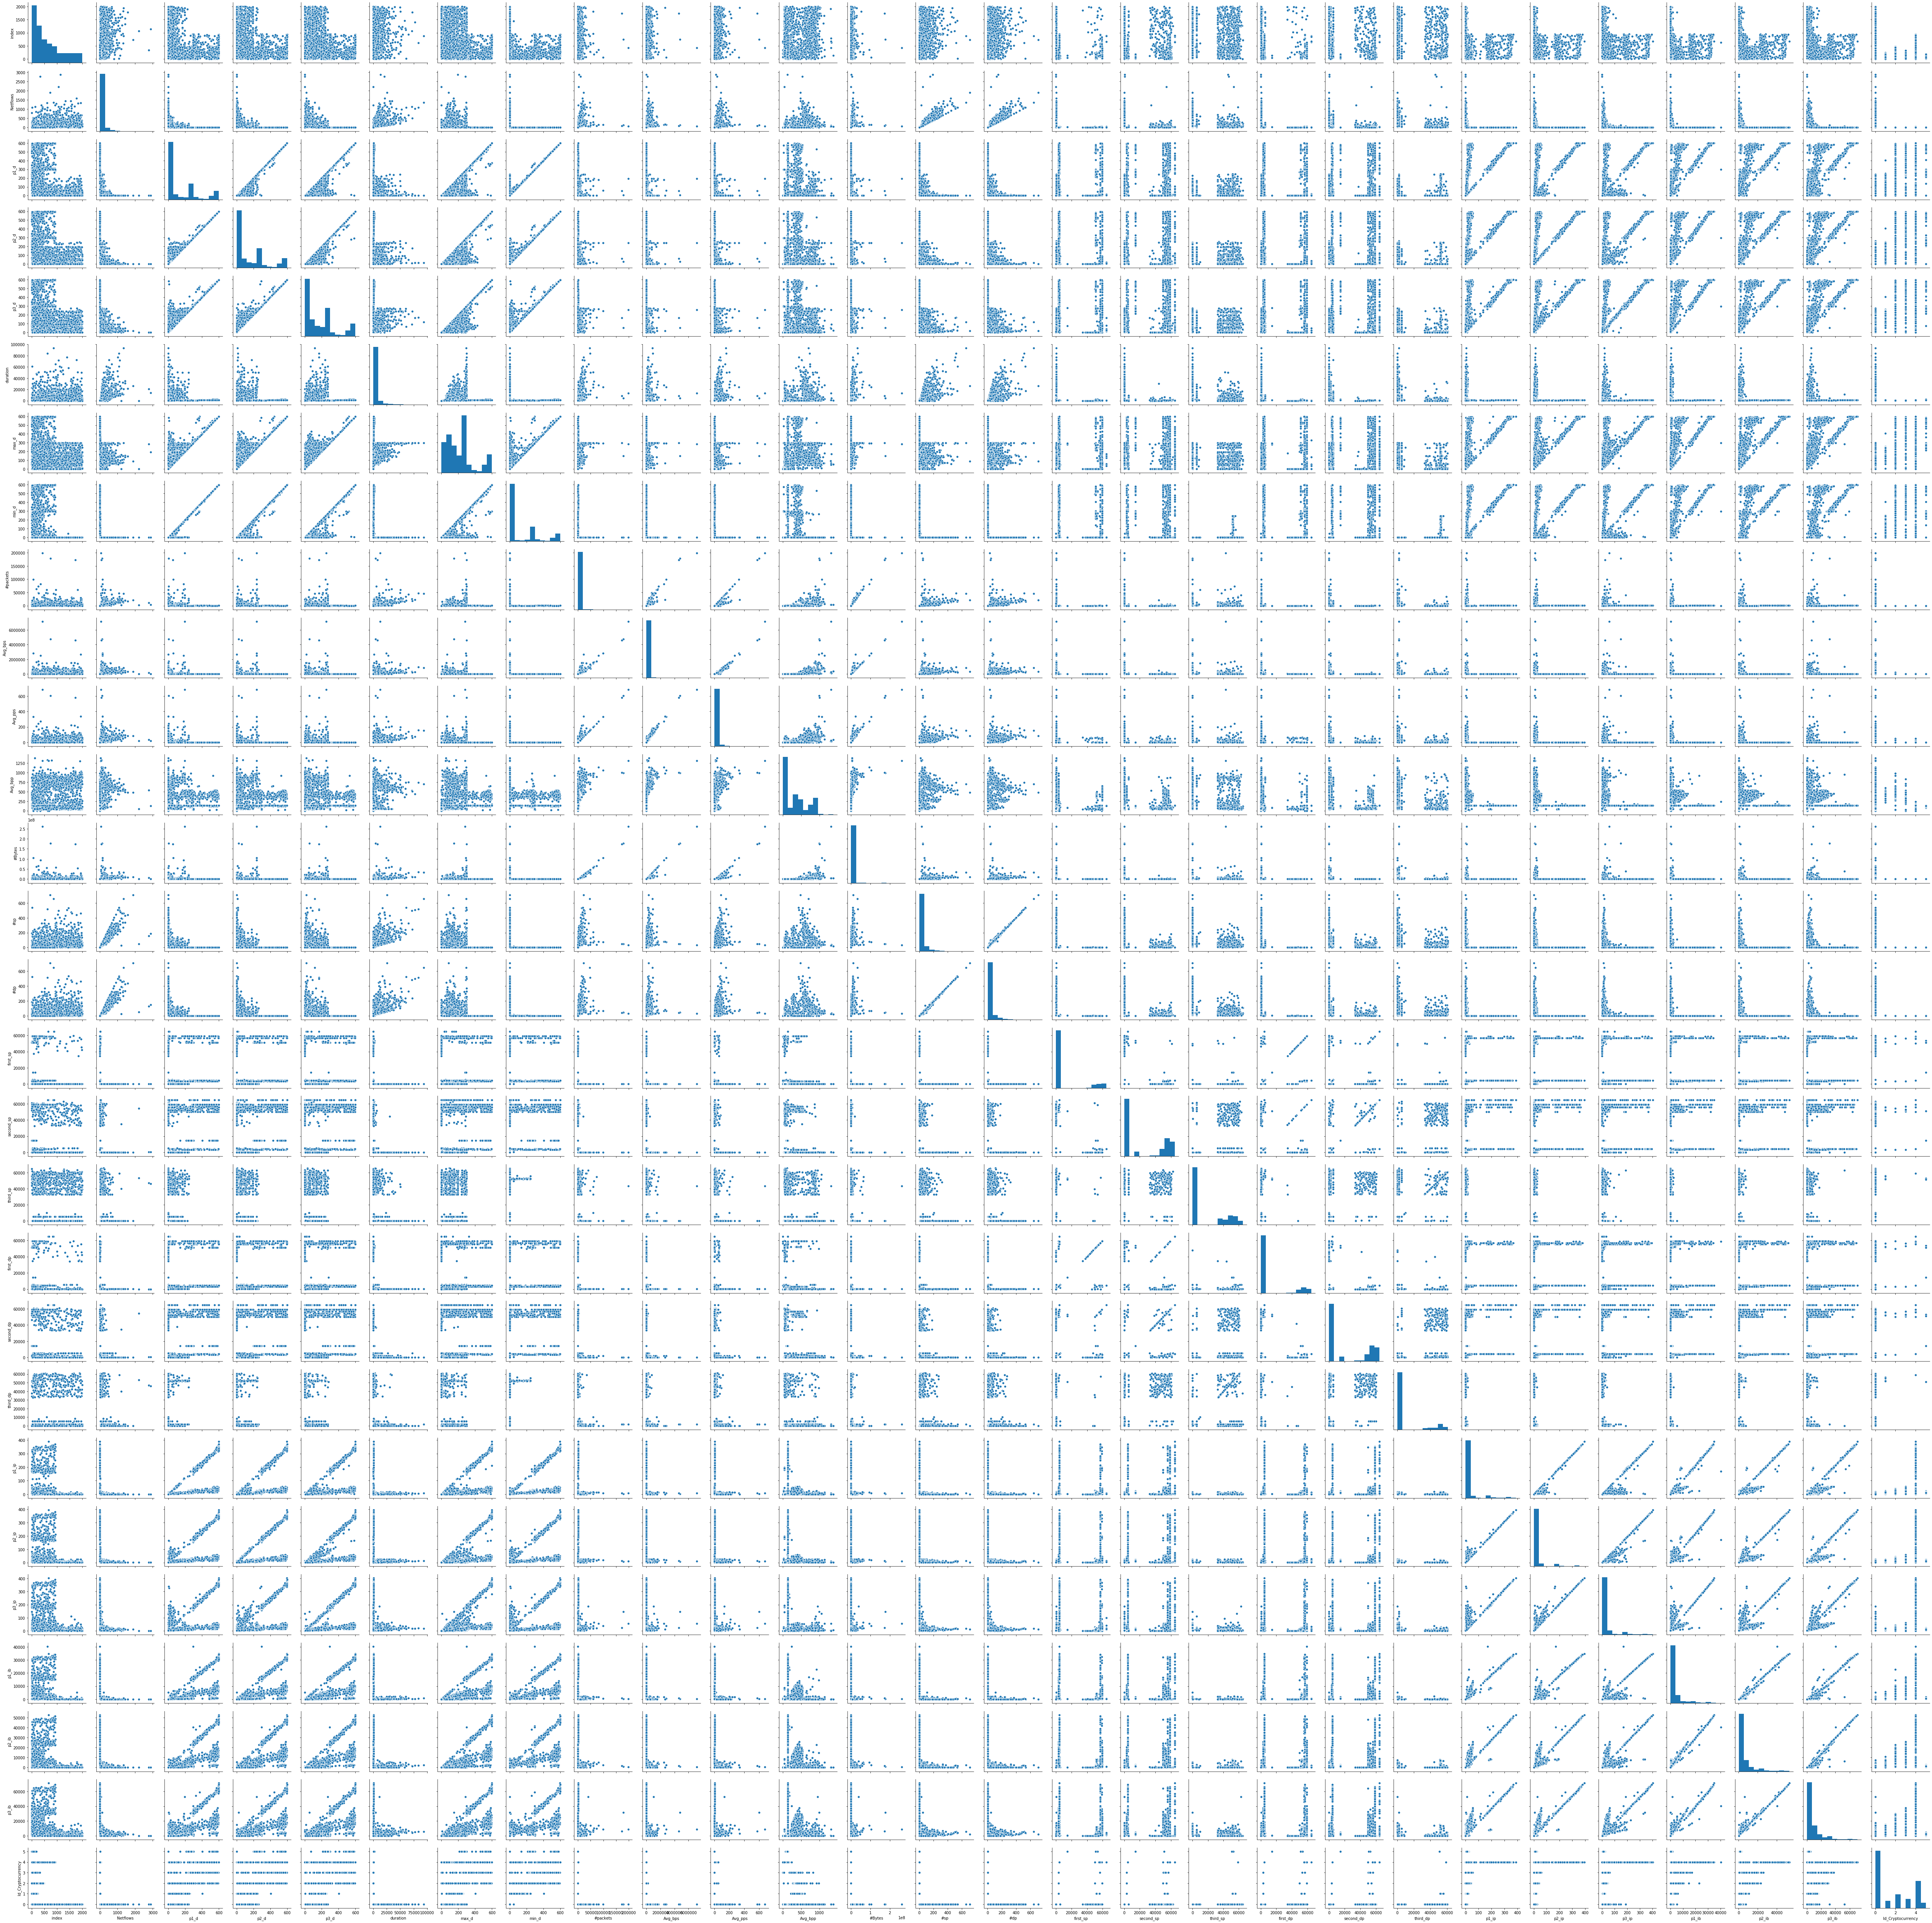

In [7]:
a = sns.pairplot(z)
a

In [13]:
data[data_numeric_float].columns

Index(['p1_d', 'p2_d', 'p3_d', 'duration', 'max_d', 'min_d', 'second_sp',
       'third_sp', 'second_dp', 'third_dp', 'p1_ip', 'p2_ip', 'p3_ip', 'p1_ib',
       'p2_ib', 'p3_ib'],
      dtype='object')

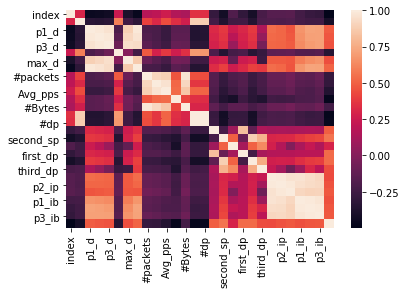

In [10]:
sns.heatmap(X.corr())